# Urban and Rural Student Performance

>Parents' perspective


- toc:false
- branch: master
- badges: true
- comments: true
- author: Evgeny Khoroshukhin
- categories: [jupyter]
- image: images/student-performance.jpg

For my project I chose this is students performance data set that can be found [here](https://archive-beta.ics.uci.edu/ml/datasets/student+performance)

# Exploratory Data Analysis

In [251]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [252]:
#hide_input
df=pd.read_csv('/content/drive/MyDrive/DS_data/student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Although there's a lot to explore in this dataset like what factors impact student performance.
Main focus was to see the differences between Urban and Rural areas but more from the parents' perspective.

here's data dictionary:

- sex - student's sex (binary: "F" - female or "M" - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: "U" - urban or "R" - rural)
- famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

# Data Wrangling

First thing I've done after exploring the data was subsetting the dataframe with necessary varibles. 

# Feature Engineering

As for Feature Engineering I've calculated the average score.

In [253]:
#calc average score

df['avg_score']=((df['G1']+df['G2']+df['G3'])/3).round(2)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,9.00
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,15.33
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,8.33
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,11.00


In [254]:
df=df.drop(['school','Dalc','Walc','G1','G2','G3','romantic','nursery','schoolsup','famsup','paid','G1','G2','G3','higher','internet','freetime','goout','health'],axis=1)
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,activities,famrel,absences,avg_score
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,no,4,6,5.67
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,5,4,5.33
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,no,4,10,8.33
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,yes,3,2,14.67
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,4,4,8.67


After doing a quick value counts  it's clear that the samples for Urban area and Rural area do not have the same ratio. Urban being about x2.5 bigger. That may skew the sample representation.

In [255]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [256]:
# Converting to a proper data types
df=df.convert_dtypes()
df.dtypes

sex            string
age             Int64
address        string
famsize        string
Pstatus        string
Medu            Int64
Fedu            Int64
Mjob           string
Fjob           string
reason         string
guardian       string
traveltime      Int64
studytime       Int64
failures        Int64
activities     string
famrel          Int64
absences        Int64
avg_score     float64
dtype: object

In [257]:
#collapse_output
df.groupby( ['address','age','sex']).sum()

Medu  Fedu  traveltime  ...  famrel  absences  avg_score
address age sex                          ...                             
R       15  F      20    22          14  ...      34        38      87.66
            M      18    17          13  ...      23        22      56.33
        16  F       9     9           4  ...      11        12      30.00
            M      26    22          15  ...      26        45      98.33
        17  F      37    34          24  ...      57        95     147.00
            M      24    27          26  ...      45        52     114.00
        18  F      36    35          32  ...      61       131     134.67
            M      33    29          24  ...      52        77     137.00
        19  F       7     7           3  ...      14        52      29.00
            M       6     6           9  ...      17        12      32.34
        21  M       1     1           1  ...       5         3       8.33
U       15  F      86    76          37  ...     116       110     284.67
            M     125   111          48  ...     155       104     496.68
        16  F     140   129          68  ...     190       306     536.30
            M     119   108          59  ...     172       204     484.64
        17  F     116   110          54  ...     164       306     480.65
            M      79    71          39  ...     117       180     292.33
        18  F      77    72          39  ...     119       130     297.98
            M      76    67          35  ...      98       158     261.34
        19  F      23    21          16  ...      39       109     105.00
            M      16    15           7  ...      23        78      55.34
        20  F       4     2           2  ...       5         4      14.67
            M       5     4           2  ...      10        11      26.67
        22  M       3     1           1  ...       5        16       7.33

[24 rows x 8 columns]

In [258]:
#collapse_output
urban_single_parents_st_avg=df[(df['address']=='U') & (df['Pstatus']=='A')].groupby(['age'])['avg_score'].mean().round(2)
urban_parents_st_avg=df[(df['address']=='U') & (df['Pstatus']=='T')].groupby(['age'])['avg_score'].mean().round(2)
rural_single_parents_st_avg=df[(df['address']=='R') & (df['Pstatus']=='A')].groupby(['age'])['avg_score'].mean().round(2)
rural_parents_st_avg=df[(df['address']=='R') & (df['Pstatus']=='T')].groupby(['age'])['avg_score'].mean().round(2)

stu=pd.concat((urban_single_parents_st_avg, urban_parents_st_avg,rural_single_parents_st_avg,rural_parents_st_avg),axis=1)
stu.columns=['U_stu_avg_sc(single_parent)', 'U_stu_avg_sc(both_parents)','R_stu_avg_sc(single_parent)','R_stu_avg_sc(both_parents)']
stu.index.name='age'
stu=stu.sort_index()
stu.head(10)


,U_stu_avg_sc(single_parent),U_stu_avg_sc(both_parents),R_stu_avg_sc(single_parent),R_stu_avg_sc(both_parents)
age,,,,
15,12.94,11.38,NaN,9.60
16,8.87,11.18,15.33,11.30
17,9.17,11.11,10.34,9.61
18,10.33,10.16,13.11,9.68
19,11.00,9.33,13.33,8.00
20,13.34,14.67,NaN,NaN
21,NaN,NaN,NaN,8.33
22,NaN,7.33,NaN,NaN


As we can see there are quite a bit of missing values. Let's fill them with average.

In [259]:
#collapse_output
stu=stu.fillna(stu.mean()).round(2)
stu.head(10)

,U_stu_avg_sc(single_parent),U_stu_avg_sc(both_parents),R_stu_avg_sc(single_parent),R_stu_avg_sc(both_parents)
age,,,,
15,12.94,11.38,13.03,9.60
16,8.87,11.18,15.33,11.30
17,9.17,11.11,10.34,9.61
18,10.33,10.16,13.11,9.68
19,11.00,9.33,13.33,8.00
20,13.34,14.67,13.03,9.42
21,10.94,10.74,13.03,8.33
22,10.94,7.33,13.03,9.42


In this table we can see students' average score of single and not single from Urban and Rural areas.
It seems like students of single parents from Rural areas have better scores on average compared with Urban counterparts.
But students whose parents live together in Urban area have better scores.

# Visualization

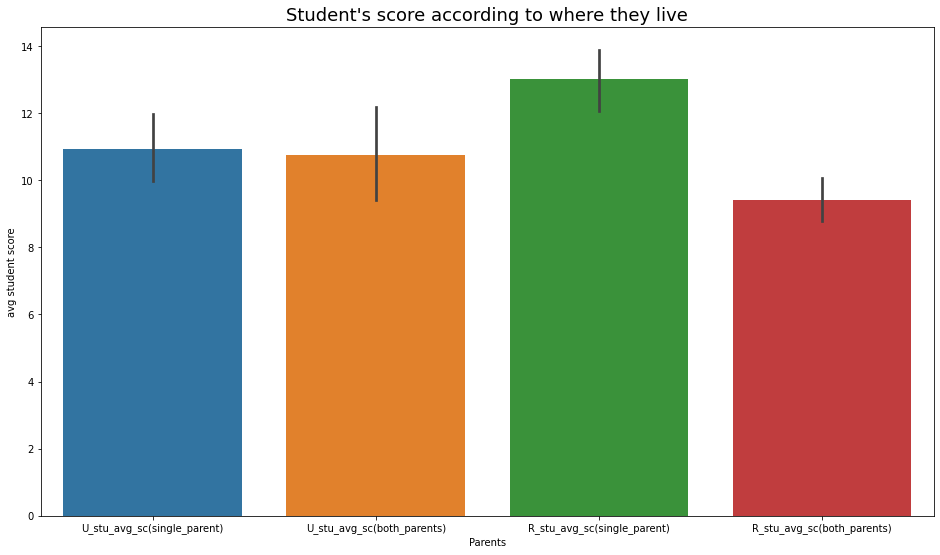

In [260]:
fig,ax=plt.subplots(figsize=(16, 9))
ax.set_title("Student's score according to where they live", fontsize=18)
ax.set_xlabel("Parents")
ax.set_ylabel("avg student score")

sns.barplot(data=stu)
plt.show()

This bar plot illustrates that students of a single parent from Rural area have better average score than other categories. 

# Hypothesis Test
 
Null Hypothesis is that the average score of students who live in Urban and Rural areas are the same.
 
Alternative Hypothesis is that the average scores are different.

In [262]:
tval,pval=stats.ttest_ind(df[df['address']=='U']['avg_score'],df[df['address']=='R']['avg_score'])
pval

0.03304768998307145

We reject the null hypothesis at the 0.05 significance level and conclude the mean score for students from Urban area and students from Rural area is different.

That shows that students from Rural areas are taking education more seriously because it could be a ticket to a better life.

The limitation of this data set is quite obviuous. 
Mainly this dataset was dedicated students, therefore there's not really a lot of info about parents.

Also like was mentioned the data for


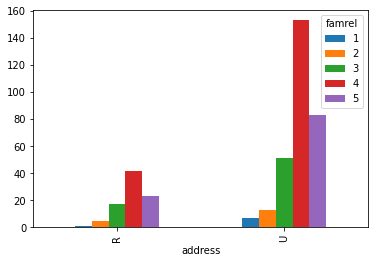

In [263]:
pd.crosstab(df['address'],df['famrel']).plot(kind='bar');

In [266]:
urban_rel=round(pd.crosstab(df['address'],df['famrel']).loc['R']*100/pd.crosstab(df['address'],df['famrel']).loc['U'])
rural_rel=pd.crosstab(df['address'],df['famrel']).loc['R']

urban_rural=pd.concat([urban_rel,rural_rel],axis=1)
urban_rural.columns=['Urban', 'Rural']
urban_rural

,Urban,Rural
famrel,,
1,14.0,1
2,38.0,5
3,33.0,17
4,27.0,42
5,28.0,23


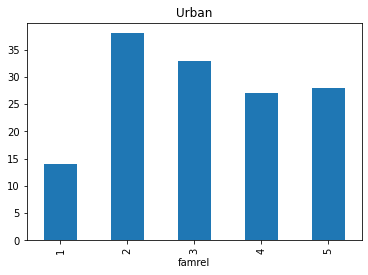

In [271]:
urban_rel.plot.bar(title='Urban')
plt.show()

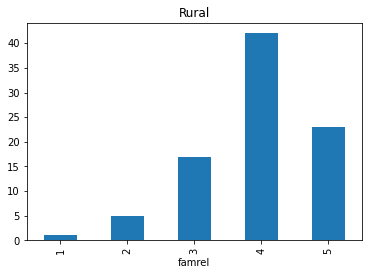

In [272]:
rural_rel.plot.bar(title='Rural')
plt.show()